In [179]:
%run ./modules/load_data_module.ipynb
%run ./modules/extract_info_clean_data_module.ipynb
%run ./modules/update_dataframe_module.ipynb
%run ./modules/sentiment_module.ipynb
%run ./modules/semantic_similarity_module.ipynb

ModuleNotFoundError: No module named 'advertools'

ModuleNotFoundError: No module named 'advertools'

In [180]:
import pandas as pd
import spacy
import string
import regex as re
import nltk
import ast
import copy
import glob
import advertools as adv
import plotly.graph_objects as go


pd.options.display.max_colwidth = 285



from textblob import TextBlob

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


from spacymoji import Emoji
from nltk.corpus import stopwords
from urllib.parse import urlparse
from textblob import Word
from sklearn.metrics.pairwise import cosine_similarity



nlp = spacy.load("en_core_web_sm")
emoji = Emoji(nlp)
nlp.add_pipe("emoji", first=True)


stemmer = nltk.SnowballStemmer("english")

ModuleNotFoundError: No module named 'advertools'

In [2]:
import pandas as pd


In [3]:
sample_tweets = pd.read_feather('sample_tweets_final_version.feather')
sample_replies = pd.read_feather('sample_replies_final_version.feather')
sample_quotes = pd.read_feather('sample_quotes_final_version.feather')


In [6]:
negative_cols = ['sentiment_score', 'avg_replies_sentiment', 'avg_quotes_sentiment', 'avg_conversation_sentiment']
df_negs = df[negative_cols]+1
df[negative_cols] = df_negs

In [7]:
df[negative_cols]

,sentiment_score,avg_replies_sentiment,avg_quotes_sentiment,avg_conversation_sentiment
0,0.3092,1.0000,1.0,1.0000
1,1.2732,1.0000,1.0,1.0000
2,1.8176,1.0000,1.0,1.0000
3,1.0000,1.0000,1.0,1.0000
4,0.4035,0.7737,1.0,0.7737
...,...,...,...,...
733,1.5362,1.0000,1.0,1.0000
734,0.5233,1.0000,1.0,1.0000
735,0.5785,1.0000,1.0,1.0000
736,1.7351,1.0000,1.0,1.0000


In [35]:
sample_tweets_1 = pd.read_csv('first_500_sample_scored.csv')
sample_tweets_1 = sample_tweets_1.iloc[:500]
sample_tweets_2 = pd.read_csv('sample_tweets_niloo.csv')
sample_tweets_3 = pd.read_csv('sample_tweets_niloo_first3weeks.csv')
sample_tweets = pd.concat([sample_tweets_1, sample_tweets_2])
sample_tweets.shape

(1238, 39)

In [188]:
sample_tweets = pd.read_csv('sample_tweets_liwc.csv')

In [107]:
pd.options.display.max_columns = None


In [153]:
sample_tweets = pd.read_csv('liwc_3.csv')

In [193]:
binarycs(sample_tweets)
sample_tweets.head()

,Unnamed: 0.1,Unnamed: 0,id,author_id,conversation_id,created_at,lang,retweet_count,reply_count,like_count,quote_count,reply_settings,text,hashtags,hashtag_count,uppercase_count,uppercase_pct,exclamation_mark_count,question_mark_count,url_count,mention_count,emojie_count,followers_count,engagement_score,sentiment_score,sentiment_category,avg_replies_sentiment,avg_quotes_sentiment,avg_conversation_sentiment,var_replies_sentiment,var_quotes_sentiment,var_conversation_sentiment,pct_similar_sentiment_replies,pct_similar_sentiment_quotes,clean_text,var_replies_semantic,var_quotes_semantic,var_conversation_semantic,GS_controversiality_score,index,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,pronoun,ppron,i,we,you,shehe,they,ipron,det,article,number,prep,auxverb,adverb,conj,negate,verb,adj,quantity,Drives,affiliation,achieve,power,Cognition,allnone,cogproc,insight,cause,discrep,tentat,certitude,differ,memory,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,swear,Social,socbehav,prosocial,polite,conflict,moral,comm,socrefs,family,friend,female,male,Culture,politic,ethnicity,tech,Lifestyle,leisure,home,work,money,relig,Physical,health,illness,wellness,mental,substances,sexual,food,death,need,want,acquire,lack,fulfill,fatigue,reward,risk,curiosity,allure,Perception,attention,motion,space,visual,auditory,feeling,time,focuspast,focuspresent,focusfuture,Conversation,netspeak,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,0,0.0,1.553750e+18,1.421530e+18,1.553750e+18,2022-07-31T14:28:31.000Z,en,1,0,0,0,everyone,This is biblical scale disinformation and mind games to create panic to destroy your civilization. #ZaidHamid #GlobalReset #WEF #NWO #FoodSecurity #EnergyCrisis #BuildBackBetter #GlobalWarming #HAARP #WeatherUpdatehttps://t.co/UphrMfrLX6,['ZaidHamid' 'GlobalReset' 'WEF' 'NWO' 'FoodSecurity' 'EnergyCrisis'\n 'BuildBackBetter' 'GlobalWarming' 'HAARP' 'WeatherUpdatehttps'],10,3,15,0,0,1,0,0,191.0,0.005208,-0.6908,Negative,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,this biblical scale disinformation mind game create panic destroy civilization zaidhamid globalreset wef nwo foodsecurity energycrisis buildbackbetter globalwarming haarp weatherupdate,0.0,0.0,0.0,1,NaN,1,29,76.81,78.45,2.10,1.00,14.50,41.38,62.07,31.03,20.69,6.90,3.45,0.00,0.00,3.45,0.0,0.0,3.45,6.90,0.00,3.45,6.90,3.45,0.0,3.45,0.0,6.90,0.00,3.45,6.90,0.00,3.45,3.45,3.45,0.00,3.45,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13.79,3.45,10.34,6.90,0.00,6.90,3.45,0.0,0.0,0.0,3.45,0.00,0.00,0.00,0.0,0.0,0.00,3.45,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,6.90,3.45,0.0,0.00,0.00,3.45,3.45,0.00,0.00,0.0,0.0,0.0,0.00,3.45,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.00,3.45,0.00,6.90,0.0,0.00,6.90,0.00,0.0,0.0,0.00,0.00,3.45,0.00,3.45,3.45,0.0,0.0,0.0,48.28,6.90,0.00,0.0,0.0,0.00,41.38
1,1,1.0,1.553780e+18,1.512380e+18,1.553780e+18,2022-07-31T16:40:39.000Z,en,0,0,0,0,everyone,"Abortion, the January 6th hearings, gun control legislation, gender and sex ideology, coronavirus, climate change, student loans... the flagship issues in the Democratic program are all loser issues - Red Wave: Trump Could Help DeSantis to Historic Win in 2024 https://tinyurl.",[],0,0,5,0,0,1,0,0,2.0,0.000000,0.2732,Positive,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,abortion january 6th hearing gun control legislation gender sex ideology coronavirus climate change student loan flagship issue democratic program loser issue red wave trump could help desantis historic win 2024,0.0,0.0,0.0,1,NaN,1,42,96.35,67.92,12.96,1.00,21.00,35.71,76.19,35.71,26.19,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,11.90,7.14,4.76,7.14,4.76,0.0,2.38,0.0,4.76,9.52,4.76,9.52,2.38,4.76,4.76,9.52,2.38,7.14,0.0,4.76,2.38,0.00,0.0,0.00,0.0,14.29,4.76,9.52,2.38,0.00,2.38,0.00,0.0,0.0,0.0,7.14,2.38,2.38,0.00,0.0,0.0,0.00,4.76,0.0,0.0,0.0,0.0,7.14,4.76,0.0,2.38,7.14,0.00,0.0,4.76,2.38,0.00,7.14,4.76,2.38,0.0,0.0,0.0,4.76,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,2.38,0.00,0.00,2.38,9.52,0.0,2.38,4.76,2.38,0.0,

In [192]:
def binarycs(df):
    df['GS_controversiality_score'] = df['GS_controversiality_score'].apply(lambda x: 0 if x<2 else 1)
    

In [194]:
df = sample_tweets
df = df.drop(['text', 'hashtags', 'clean_text', 'created_at', 'id', 'author_id', 'conversation_id', 'Unnamed: 0', 'index'], axis=1)
#df['created_at'] = pd.to_datetime(df['created_at'], infer_datetime_format=True)  

In [195]:
X = df.drop(['GS_controversiality_score'], axis=1)

y = df['GS_controversiality_score']

In [196]:
y = y.astype(int)

In [197]:
from sklearn.model_selection import train_test_split


In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [199]:
X_train.shape, X_test.shape


((866, 148), (372, 148))

In [200]:
X_train.dtypes

Unnamed: 0.1       int64
lang              object
retweet_count      int64
reply_count        int64
like_count         int64
                  ...   
Comma            float64
QMark            float64
Exclam           float64
Apostro          float64
OtherP           float64
Length: 148, dtype: object

In [201]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == '0']

categorical

[]

In [202]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Unnamed: 0.1',
 'retweet_count',
 'reply_count',
 'like_count',
 'quote_count',
 'hashtag_count',
 'uppercase_count',
 'uppercase_pct',
 'exclamation_mark_count',
 'question_mark_count',
 'url_count',
 'mention_count',
 'emojie_count',
 'followers_count',
 'engagement_score',
 'sentiment_score',
 'avg_replies_sentiment',
 'avg_quotes_sentiment',
 'avg_conversation_sentiment',
 'var_replies_sentiment',
 'var_quotes_sentiment',
 'var_conversation_sentiment',
 'pct_similar_sentiment_replies',
 'pct_similar_sentiment_quotes',
 'var_replies_semantic',
 'var_quotes_semantic',
 'var_conversation_semantic',
 'Segment',
 'WC',
 'Analytic',
 'Clout',
 'Authentic',
 'Tone',
 'WPS',
 'BigWords',
 'Dic',
 'Linguistic',
 'function',
 'pronoun',
 'ppron',
 'i',
 'we',
 'you',
 'shehe',
 'they',
 'ipron',
 'det',
 'article',
 'number',
 'prep',
 'auxverb',
 'adverb',
 'conj',
 'negate',
 'verb',
 'adj',
 'quantity',
 'Drives',
 'affiliation',
 'achieve',
 'power',
 'Cognition',
 'allnone',
 'cogproc

In [203]:
(df[numerical] < 0).sum()

Unnamed: 0.1     0
retweet_count    0
reply_count      0
like_count       0
quote_count      0
                ..
Comma            0
QMark            0
Exclam           0
Apostro          0
OtherP           0
Length: 145, dtype: int64

In [204]:
import category_encoders as ce
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline


In [205]:
encoder = ce.OneHotEncoder(cols=['sentiment_category', 'lang', 'reply_settings'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [206]:
cols = X_train.columns
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])

X_test = pd.DataFrame(X_test, columns=[cols])

In [127]:
yy= y_train.astype(int)
yy

1200    0
65      0
1222    0
568     2
1021    0
       ..
763     0
835     1
1216    0
559     0
684     0
Name: GS_controversiality_score, Length: 866, dtype: int32

In [128]:
yyy = np.array(['2', '0', '0', '1', '1', '0', '2', '3', '2', '2', '0', '1', '0',
       '0', '3', '0', '0', '0', '0', '2', '0', '0', '0', '0', '2', '1',
       '1', '0', '0', '2', '2', '0', '0', '1', '1', '0', '0', '2', '0',
       '2', '2', '2', '2', '2', '0', '0', '3', '1', '1', '0', '0', '2',
       '0', '1', '0', '2', '3', '0', '0', '0', '2', '0', '0', '2', '0',
       '0', '3', '1', '1', '0', '2', '3', '0', '0', '0', '0', '3', '3',
       '0', '1', '1', '1', '2', '3', '3', '2', '1', '0', '3', '1', '0',
       '2', '3', '3', '0', '0', '0', '0', '2', '0', '1', '2', '0', '0',
       '1', '3', '1', '2', '1', '0', '2', '0', '1', '3', '0', '0', '2',
       '0', '2', '2', '2', '2', '1', '3', '1', '2', '3', '0', '1', '0',
       '2', '0', '0', '2', '3', '3', '0', '0', '0', '0', '3', '3', '0',
       '0', '0', '3', '0', '0', '1', '3', '0', '1', '0', '0', '0', '0', '0',
       '1', '3', '0', '0', '0', '2', '0', '1', '0', '1', '2', '0', '0',
       '1', '3', '1', '0', '0', '3', '0', '0', '3', '1', '0', '0', '2',
       '0', '1', '0', '2', '0', '0', '1', '0', '3', '0', '2', '1', '3',
       '1', '0', '0', '3', '0', '0', '1', '0', '3', '0', '0', '2', '0',
       '0', '1', '3', '0', '0', '0', '3', '2', '1', '2', '3', '2', '3',
       '3', '0', '3', '1', '0', '2', '0', '2', '0', '0', '1', '1', '2',
       '1', '1', '2', '0', '0', '0', '0', '0', '3', '0', '1', '0', '1',
       '0', '0', '3', '0', '0', '3', '0', '0', '2', '0', '0', '0', '3',
       '0', '2', '0', '0', '1', '3', '0', '0', '3', '2', '0', '1', '0',
       '1', '1', '0', '0'])

In [129]:
type(yyy[1])

numpy.str_

In [130]:
y_train.isnull()

1200    False
65      False
1222    False
568     False
1021    False
        ...  
763     False
835     False
1216    False
559     False
684     False
Name: GS_controversiality_score, Length: 866, dtype: bool

In [131]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = sample_tweets
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Input X must be non-negative.

In [137]:
from matplotlib.pyplot import figure

figure(figsize=(100, 10), dpi=80)

<Figure size 8000x800 with 0 Axes>

<Figure size 8000x800 with 0 Axes>

In [141]:
feat_importances

Unnamed: 0.1     0.020909
lang_1           0.000000
retweet_count    0.012008
reply_count      0.014115
like_count       0.018920
                   ...   
Comma            0.010099
QMark            0.012237
Exclam           0.007395
Apostro          0.011170
OtherP           0.012194
Length: 108, dtype: float64

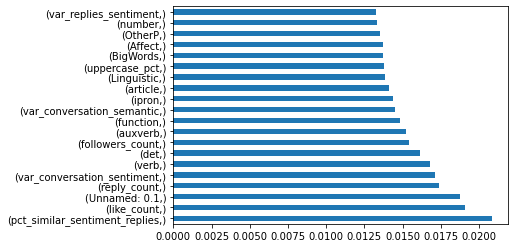

<Figure size 720x7200 with 0 Axes>

In [152]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(100)
plt.show()

In [207]:
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB()


# fit the model
gnb.fit(X_train, y_train)

BernoulliNB()

In [208]:
y_pred = gnb.predict(X_test)

y_pred

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,

In [209]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.6183


In [210]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
cm

0.8252688172043011


array([[299,   7],
       [ 58,   8]], dtype=int64)

In [211]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf_ft = clf.fit(X_train, y_train)

clf_predictions = clf_ft.predict(X_test)
  
# model accuracy for X_test  
accuracy = clf_ft.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(accuracy)

0.7661290322580645


In [213]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(accuracy)

0.8145161290322581


In [212]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=30, random_state=7)
clf_ft = clf.fit(X_train, y_train)

clf_predictions = clf_ft.predict(X_test)
  
# model accuracy for X_test  
accuracy = clf_ft.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print(accuracy)

0.8440860215053764


In [ ]:

# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
  
# loading the iris dataset
iris = datasets.load_iris()
  
# X -> features, y -> label
X = iris.data
y = iris.target
  
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
  
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [ ]:
y_train

In [ ]:
print(len(sample_tweets), len(sample_replies), len(sample_quotes))

In [ ]:
def add_cs_score_column(df):
    df['GS_controversiality_score'] = None
    return df

In [177]:
def update_controversiality_score(df_tweet, df_reply, df_quote, from_idx, to_idx):
    """
    input:
        df_tweet: sample dataframe of tweets
        df_reply: sample dataframe of replies
        df_quote: sample dataframe of quotes
        from_idx: integer, the first index of the tweets sub-sample. 
        to_idx: integer, the last index of the tweets sub-sample

    output:
        dataframe, the tweets dataframe, the GS_controversiality_score of the selected sub-sample is updated.
    
    How it works?
        it shows a tweet and all information about it as a dataframe
        it then asks if you want to see the dataframe contining the replies and the information about replies
        TO SEE THE REPLIES: press y, to continue without reading the replies, press any other key
        it ask it you want to see the dataframe containing the quotes
        TO SEE THE QUOTES: press y, to continue without reading the replies press any other key
        
        Finally:
            it asks you to give some score for the GS_controversiality_score. the inputs are:
                0 : not controversial
                1 : somewhat controversial
                2 : controversial
                3 : very controversial
    """
    df_sample = copy.deepcopy(df_tweet.iloc[from_idx:to_idx])
    
    for i, row in df_sample.iterrows():
        display(row.to_frame())
        
        #print('Read replies?')
        #reply = input()
        
        #if reply == 'y':
        #    display(get_conversation(row['conversation_id'], df_reply))
            
        #print('Read quotes?')
        #quote = input()
        
        #if quote == 'y':
        #    display(get_conversation(row['conversation_id'], df_reply))
            
            
        print('The score would be:')
        score_range = [0, 1, 2, 3]
        score = input()
        
        if int(score) not in score_range:
            print('INVALID SCORE')
            score = input()
            if int(score) not in score_range:
                print("FINAL CHANCE TO GIVE A VALID SCORE!")
                score = input()
        
        
        df_tweet.at[i, ['GS_controversiality_score']] = score
        
        print(f"score stored for the {i} row is {score}")
        
            
        print('********************************************************************************************', end="")
       
        
    return df_tweet
        
        


In [183]:
pd.set_option('display.expand_frame_repr', False)
pd.options.display.width = 0
pd.set_option('display.max_colwidth', None)


In [ ]:
sample_tweets = pd.read_feather('final_scores.feather')

In [184]:
sample_tweets

,id,author_id,conversation_id,created_at,lang,retweet_count,reply_count,like_count,quote_count,reply_settings,text,hashtags,hashtag_count,uppercase_count,uppercase_pct,exclamation_mark_count,question_mark_count,url_count,mention_count,emojie_count,followers_count,engagement_score,sentiment_score,sentiment_category,avg_replies_sentiment,avg_quotes_sentiment,avg_conversation_sentiment,var_replies_sentiment,var_quotes_sentiment,var_conversation_sentiment,pct_similar_sentiment_replies,pct_similar_sentiment_quotes,clean_text,var_replies_semantic,var_quotes_semantic,var_conversation_semantic,GS_controversiality_score
0,1553749453990817792,1421531202037686272,1553749453990817792,2022-07-31T14:28:31.000Z,en,1,0,0,0,everyone,This is biblical scale disinformation and mind games to create panic to destroy your civilization. #ZaidHamid #GlobalReset #WEF #NWO #FoodSecurity #EnergyCrisis #BuildBackBetter #GlobalWarming #HAARP #WeatherUpdatehttps://t.co/UphrMfrLX6,"[ZaidHamid, GlobalReset, WEF, NWO, FoodSecurity, EnergyCrisis, BuildBackBetter, GlobalWarming, HAARP, WeatherUpdatehttps]",10,3,15,0,0,1,0,0,191.0,0.005208,-0.6908,Negative,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,this biblical scale disinformation mind game create panic destroy civilization zaidhamid globalreset wef nwo foodsecurity energycrisis buildbackbetter globalwarming haarp weatherupdate,0.0,0.0,0.0,3
1,1553782705623547907,1512380832169746439,1553782705623547907,2022-07-31T16:40:39.000Z,en,0,0,0,0,everyone,"Abortion, the January 6th hearings, gun control legislation, gender and sex ideology, coronavirus, climate change, student loans... the flagship issues in the Democratic program are all loser issues - Red Wave: Trump Could Help DeSantis to Historic Win in 2024 https://tinyurl.",[],0,0,5,0,0,1,0,0,2.0,0.0,0.2732,Positive,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,abortion january 6th hearing gun control legislation gender sex ideology coronavirus climate change student loan flagship issue democratic program loser issue red wave trump could help desantis historic win 2024,0.0,0.0,0.0,3
2,1553823822788313089,436791564,1553823822788313089,2022-07-31T19:24:02.000Z,en,2,0,3,0,everyone,"[Kano Nigeria] Many thanks to our devoted volunteers. In an effort to mitigate the consequences of climate change on our communities, the Panacea Foundation commenced the planting of 3000 seedlings in Minjibir. By the end of 2022, we hope to have planted 100,000 seedlings, https://t.co/huyOFhk8CY",[],0,0,5,0,0,1,0,0,1559.0,0.003205,0.8176,Positive,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,kano nigeria many thanks devoted volunteer in effort mitigate consequence climate change community panacea foundation commenced planting 3000 seedling minjibir by end 2022 hope planted 100000 seedling,0.0,0.0,0.0,0
3,1553870393521438720,1297869819681931264,1553870393521438720,2022-07-31T22:29:05.000Z,en,0,0,1,0,everyone,climate change (taylor’s version),[],0,0,0,0,0,0,0,0,36.0,0.027027,0.0000,Neutral,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,climate change taylor version,0.0,0.0,0.0,0
4,1553810474654994433,258896387,1553810474654994433,2022-07-31T18:31:00.000Z,en,1,1,2,0,everyone,Matt's Weather Rapport: #Kentucky mega flash flood and climate change is weighing on me more than most recent disasters. Details: https://t.co/sNVaF4K2K5 #climatecrisis https://t.co/fub71TzTaF,"[Kentucky, climatecrisis]",2,0,8,0,0,2,0,0,1541.0,0.002594,-0.5965,Negative,-0.2263,0.0,-0.2263,0.0,0.0,0.0,100.0,0.0,matts weather rapport kentucky mega flash flood climate change weighing recent disaster details climatecrisis,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3971,1551007801132036097,1536397843430223872,1551007801132036097,2022-07-24T00:54:10.000Z,en,0,0,1,0,everyone,"If it's -1.6 DC in Iceland 32 DF it's about 8.6 DC 102 DF in scale. I don't believe in climate change. I believe in diseases and civil uproar and birds and planes 

In [ ]:
df.to_csv('final_scores.csv')

In [ ]:
df3 = df.iloc[:500]
df3['GS_controversiality_score'].isnull().sum()

In [187]:
# Toy example of the function
sample_tweets = pd.read_feather('final_scores.feather')
df = update_controversiality_score(sample_tweets, sample_replies, sample_quotes, 2004, 2100)
df.to_feather('final_scores.feather')

,2004
id,1550179569835065345
author_id,120209971
conversation_id,1550179569835065345
created_at,2022-07-21T18:03:05.000Z
lang,en
retweet_count,0
reply_count,0
like_count,2
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2004 row is 1
********************************************************************************************

,2005
id,1550192305252012032
author_id,1515848470443315203
conversation_id,1550192305252012032
created_at,2022-07-21T18:53:41.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2005 row is 0
********************************************************************************************

,2006
id,1550142704578969600
author_id,97775155
conversation_id,1550142704578969600
created_at,2022-07-21T15:36:35.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2006 row is 0
********************************************************************************************

,2007
id,1550042031233409024
author_id,37769981
conversation_id,1550042031233409024
created_at,2022-07-21T08:56:33.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2007 row is 0
********************************************************************************************

,2008
id,1550013900023894016
author_id,1545860250133319683
conversation_id,1550013900023894016
created_at,2022-07-21T07:04:46.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2008 row is 3
********************************************************************************************

,2009
id,1550155460413628416
author_id,41438290
conversation_id,1550155460413628416
created_at,2022-07-21T16:27:16.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2009 row is 0
********************************************************************************************

,2010
id,1550086679683383296
author_id,324425948
conversation_id,1550086679683383296
created_at,2022-07-21T11:53:58.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2010 row is 1
********************************************************************************************

,2011
id,1550128396901855235
author_id,514453109
conversation_id,1550128396901855235
created_at,2022-07-21T14:39:44.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2011 row is 0
********************************************************************************************

,2012
id,1549943804500787203
author_id,17074125
conversation_id,1549943804500787203
created_at,2022-07-21T02:26:14.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2012 row is 0
********************************************************************************************

,2013
id,1549937304839536641
author_id,862770138315149312
conversation_id,1549937304839536641
created_at,2022-07-21T02:00:24.000Z
lang,en
retweet_count,1
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2013 row is 0
********************************************************************************************

,2014
id,1550205257120194560
author_id,3339086554
conversation_id,1550205257120194560
created_at,2022-07-21T19:45:09.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2014 row is 0
********************************************************************************************

,2015
id,1550004682910728192
author_id,1400431467390377989
conversation_id,1550004682910728192
created_at,2022-07-21T06:28:08.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2015 row is 0
********************************************************************************************

,2016
id,1550043682786902016
author_id,1549975919527608321
conversation_id,1550043682786902016
created_at,2022-07-21T09:03:07.000Z
lang,en
retweet_count,0
reply_count,1
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2016 row is 0
********************************************************************************************

,2017
id,1549934523969949697
author_id,1519026183895240706
conversation_id,1549934523969949697
created_at,2022-07-21T01:49:21.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2017 row is 0
********************************************************************************************

,2018
id,1550054126603698179
author_id,1036671183490637824
conversation_id,1550054126603698179
created_at,2022-07-21T09:44:37.000Z
lang,en
retweet_count,0
reply_count,1
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2018 row is 2
********************************************************************************************

,2019
id,1550059717808078850
author_id,118354960
conversation_id,1550059717808078850
created_at,2022-07-21T10:06:50.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2019 row is 2
********************************************************************************************

,2020
id,1550179801758986240
author_id,1314336825725652998
conversation_id,1550179801758986240
created_at,2022-07-21T18:04:00.000Z
lang,en
retweet_count,1
reply_count,1
like_count,2
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2020 row is 0
********************************************************************************************

,2021
id,1550081976039768064
author_id,1317814185175244802
conversation_id,1550081976039768064
created_at,2022-07-21T11:35:16.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2021 row is 3
********************************************************************************************

,2022
id,1550125657660698625
author_id,18543050
conversation_id,1550125657660698625
created_at,2022-07-21T14:28:51.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2022 row is 0
********************************************************************************************

,2023
id,1550088203981438976
author_id,1654797380
conversation_id,1550088203981438976
created_at,2022-07-21T12:00:01.000Z
lang,en
retweet_count,1
reply_count,0
like_count,2
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2023 row is 0
********************************************************************************************

,2024
id,1549993790991106049
author_id,603210294
conversation_id,1549993790991106049
created_at,2022-07-21T05:44:51.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2024 row is 0
********************************************************************************************

,2025
id,1550116625201782785
author_id,1363919009616429077
conversation_id,1550116625201782785
created_at,2022-07-21T13:52:57.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2025 row is 0
********************************************************************************************

,2026
id,1550056107963555840
author_id,50308678
conversation_id,1550056107963555840
created_at,2022-07-21T09:52:29.000Z
lang,en
retweet_count,4
reply_count,7
like_count,23
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2026 row is 0
********************************************************************************************

,2027
id,1550172615750336512
author_id,296959373
conversation_id,1550172615750336512
created_at,2022-07-21T17:35:27.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,1
reply_settings,everyone


The score would be:
2
score stored for the 2027 row is 2
********************************************************************************************

,2028
id,1550130142457909250
author_id,1150349209872359425
conversation_id,1550130142457909250
created_at,2022-07-21T14:46:40.000Z
lang,en
retweet_count,0
reply_count,0
like_count,2
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2028 row is 2
********************************************************************************************

,2029
id,1549946309993431041
author_id,298602588
conversation_id,1549946309993431041
created_at,2022-07-21T02:36:11.000Z
lang,en
retweet_count,0
reply_count,0
like_count,3
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2029 row is 1
********************************************************************************************

,2030
id,1550103874148700160
author_id,369833271
conversation_id,1550103874148700160
created_at,2022-07-21T13:02:17.000Z
lang,en
retweet_count,293
reply_count,117
like_count,958
quote_count,17
reply_settings,everyone


The score would be:
2
score stored for the 2030 row is 2
********************************************************************************************

,2031
id,1550236923511603201
author_id,1148329822399021056
conversation_id,1550236923511603201
created_at,2022-07-21T21:50:59.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2031 row is 0
********************************************************************************************

,2032
id,1549914554108297217
author_id,21322076
conversation_id,1549914554108297217
created_at,2022-07-21T00:30:00.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2032 row is 1
********************************************************************************************

,2033
id,1550066839912423424
author_id,2769757823
conversation_id,1550066839912423424
created_at,2022-07-21T10:35:08.000Z
lang,en
retweet_count,1
reply_count,1
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2033 row is 2
********************************************************************************************

,2034
id,1550032252435931137
author_id,2957416072
conversation_id,1550032252435931137
created_at,2022-07-21T08:17:41.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2034 row is 0
********************************************************************************************

,2035
id,1549981813141295104
author_id,1532487220787138576
conversation_id,1549981813141295104
created_at,2022-07-21T04:57:16.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2035 row is 2
********************************************************************************************

,2036
id,1549928480342585346
author_id,1451275210007752711
conversation_id,1549928480342585346
created_at,2022-07-21T01:25:20.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2036 row is 2
********************************************************************************************

,2037
id,1549946838140305409
author_id,1386507207316058118
conversation_id,1549946838140305409
created_at,2022-07-21T02:38:17.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2037 row is 2
********************************************************************************************

,2038
id,1550186230733631489
author_id,15182798
conversation_id,1550186230733631489
created_at,2022-07-21T18:29:33.000Z
lang,en
retweet_count,2
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2038 row is 0
********************************************************************************************

,2039
id,1549925174731874305
author_id,1273848278
conversation_id,1549925174731874305
created_at,2022-07-21T01:12:12.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2039 row is 0
********************************************************************************************

,2040
id,1550254105481941018
author_id,1412110192108572683
conversation_id,1550254105481941018
created_at,2022-07-21T22:59:15.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2040 row is 2
********************************************************************************************

,2041
id,1550137130629955586
author_id,1549102306548924416
conversation_id,1550137130629955586
created_at,2022-07-21T15:14:26.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2041 row is 3
********************************************************************************************

,2042
id,1550237779988291585
author_id,897399651481120768
conversation_id,1550237779988291585
created_at,2022-07-21T21:54:23.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2042 row is 0
********************************************************************************************

,2043
id,1550152873672990721
author_id,25912403
conversation_id,1550152873672990721
created_at,2022-07-21T16:17:00.000Z
lang,en
retweet_count,1
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2043 row is 0
********************************************************************************************

,2044
id,1550118225400082436
author_id,1442408319608516614
conversation_id,1550118225400082436
created_at,2022-07-21T13:59:19.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2044 row is 2
********************************************************************************************

,2045
id,1550072225809567744
author_id,1453986825618563073
conversation_id,1550072225809567744
created_at,2022-07-21T10:56:32.000Z
lang,en
retweet_count,13
reply_count,0
like_count,16
quote_count,1
reply_settings,everyone


The score would be:
0
score stored for the 2045 row is 0
********************************************************************************************

,2046
id,1550227541763543040
author_id,1501008147829473299
conversation_id,1550227541763543040
created_at,2022-07-21T21:13:42.000Z
lang,en
retweet_count,0
reply_count,1
like_count,9
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2046 row is 0
********************************************************************************************

,2047
id,1550038239045722112
author_id,1484872762284032005
conversation_id,1550038239045722112
created_at,2022-07-21T08:41:29.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2047 row is 2
********************************************************************************************

,2048
id,1549950752331894786
author_id,909730576986492933
conversation_id,1549950752331894786
created_at,2022-07-21T02:53:50.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2048 row is 2
********************************************************************************************

,2049
id,1550083320058363910
author_id,1461297193307025417
conversation_id,1550083320058363910
created_at,2022-07-21T11:40:37.000Z
lang,en
retweet_count,5
reply_count,2
like_count,12
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2049 row is 3
********************************************************************************************

,2050
id,1550131234734387200
author_id,44203943
conversation_id,1550131234734387200
created_at,2022-07-21T14:51:01.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2050 row is 0
********************************************************************************************

,2051
id,1549994441712214017
author_id,1522283691564752896
conversation_id,1549994441712214017
created_at,2022-07-21T05:47:27.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2051 row is 0
********************************************************************************************

,2052
id,1550236859162296320
author_id,1361750811747835904
conversation_id,1550236859162296320
created_at,2022-07-21T21:50:43.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2052 row is 1
********************************************************************************************

,2053
id,1550055134243217408
author_id,1442408319608516614
conversation_id,1550055134243217408
created_at,2022-07-21T09:48:37.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2053 row is 0
********************************************************************************************

,2054
id,1550000494642434048
author_id,88152479
conversation_id,1550000494642434048
created_at,2022-07-21T06:11:30.000Z
lang,en
retweet_count,0
reply_count,1
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2054 row is 0
********************************************************************************************

,2055
id,1549924747378511872
author_id,1345903122929967105
conversation_id,1549924747378511872
created_at,2022-07-21T01:10:30.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2055 row is 3
********************************************************************************************

,2056
id,1550080943045705728
author_id,1394082559622008834
conversation_id,1550080943045705728
created_at,2022-07-21T11:31:10.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2056 row is 3
********************************************************************************************

,2057
id,1550032452948836353
author_id,42410755
conversation_id,1550032452948836353
created_at,2022-07-21T08:18:29.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2057 row is 0
********************************************************************************************

,2058
id,1550047422310760448
author_id,1280495862112804864
conversation_id,1550047422310760448
created_at,2022-07-21T09:17:58.000Z
lang,en
retweet_count,0
reply_count,0
like_count,6
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2058 row is 3
********************************************************************************************

,2059
id,1550197389297942529
author_id,399015776
conversation_id,1550197389297942529
created_at,2022-07-21T19:13:53.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2059 row is 3
********************************************************************************************

,2060
id,1550243315102072832
author_id,27010123
conversation_id,1550243315102072832
created_at,2022-07-21T22:16:23.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2060 row is 3
********************************************************************************************

,2061
id,1549970658540392448
author_id,346304908
conversation_id,1549970658540392448
created_at,2022-07-21T04:12:56.000Z
lang,en
retweet_count,8
reply_count,1
like_count,12
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2061 row is 0
********************************************************************************************

,2062
id,1549963378235305984
author_id,1186621065193316352
conversation_id,1549963378235305984
created_at,2022-07-21T03:44:00.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2062 row is 1
********************************************************************************************

,2063
id,1550025092725440512
author_id,1051425060152627201
conversation_id,1550025092725440512
created_at,2022-07-21T07:49:14.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
1
score stored for the 2063 row is 1
********************************************************************************************

,2064
id,1550252622510170113
author_id,154266844
conversation_id,1550252622510170113
created_at,2022-07-21T22:53:22.000Z
lang,en
retweet_count,1
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2064 row is 0
********************************************************************************************

,2065
id,1549909218274131968
author_id,1070757176728272896
conversation_id,1549909218274131968
created_at,2022-07-21T00:08:48.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2065 row is 0
********************************************************************************************

,2066
id,1550236866703761408
author_id,6134882
conversation_id,1550236866703761408
created_at,2022-07-21T21:50:45.000Z
lang,en
retweet_count,19
reply_count,2
like_count,27
quote_count,2
reply_settings,everyone


The score would be:
0
score stored for the 2066 row is 0
********************************************************************************************

,2067
id,1550114259366846464
author_id,216069324
conversation_id,1550114259366846464
created_at,2022-07-21T13:43:33.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2067 row is 2
********************************************************************************************

,2068
id,1552131831855603713
author_id,839981728575897600
conversation_id,1552131831855603713
created_at,2022-07-27T03:20:40.000Z
lang,en
retweet_count,1
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2068 row is 0
********************************************************************************************

,2069
id,1552393524695400450
author_id,46994245
conversation_id,1552393524695400450
created_at,2022-07-27T20:40:33.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2069 row is 0
********************************************************************************************

,2070
id,1552092583161110534
author_id,1090267247258460161
conversation_id,1552092583161110534
created_at,2022-07-27T00:44:42.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2070 row is 0
********************************************************************************************

,2071
id,1552439348884574210
author_id,1438530561471967234
conversation_id,1552439348884574210
created_at,2022-07-27T23:42:38.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2071 row is 0
********************************************************************************************

,2072
id,1552411182036054016
author_id,1885261729
conversation_id,1552411182036054016
created_at,2022-07-27T21:50:42.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2072 row is 0
********************************************************************************************

,2073
id,1552384580526768129
author_id,1426411870911713283
conversation_id,1552384580526768129
created_at,2022-07-27T20:05:00.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2073 row is 0
********************************************************************************************

,2074
id,1552150712901324801
author_id,53100827
conversation_id,1552150712901324801
created_at,2022-07-27T04:35:42.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2074 row is 2
********************************************************************************************

,2075
id,1552340751777939457
author_id,1096724430087208960
conversation_id,1552340751777939457
created_at,2022-07-27T17:10:50.000Z
lang,en
retweet_count,2
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2075 row is 0
********************************************************************************************

,2076
id,1552434086534598656
author_id,251324964
conversation_id,1552434086534598656
created_at,2022-07-27T23:21:43.000Z
lang,en
retweet_count,1
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2076 row is 2
********************************************************************************************

,2077
id,1552273070857101313
author_id,1417216531793068039
conversation_id,1552273070857101313
created_at,2022-07-27T12:41:54.000Z
lang,en
retweet_count,3
reply_count,0
like_count,4
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2077 row is 2
********************************************************************************************

,2078
id,1552288669310017536
author_id,364306469
conversation_id,1552288669310017536
created_at,2022-07-27T13:43:53.000Z
lang,en
retweet_count,1
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2078 row is 2
********************************************************************************************

,2079
id,1552292190264737792
author_id,1084553456361369607
conversation_id,1552292190264737792
created_at,2022-07-27T13:57:53.000Z
lang,en
retweet_count,3
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2079 row is 3
********************************************************************************************

,2080
id,1552147731170308097
author_id,1136348443
conversation_id,1552147731170308097
created_at,2022-07-27T04:23:51.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2080 row is 0
********************************************************************************************

,2081
id,1552336515140919296
author_id,95949373
conversation_id,1552336515140919296
created_at,2022-07-27T16:54:00.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2081 row is 0
********************************************************************************************

,2082
id,1552335696030998530
author_id,1496230698
conversation_id,1552335696030998530
created_at,2022-07-27T16:50:45.000Z
lang,en
retweet_count,0
reply_count,0
like_count,3
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2082 row is 0
********************************************************************************************

,2083
id,1552427079479672832
author_id,1442408319608516614
conversation_id,1552427079479672832
created_at,2022-07-27T22:53:53.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2083 row is 3
********************************************************************************************

,2084
id,1552182781752610816
author_id,3686839935
conversation_id,1552182781752610816
created_at,2022-07-27T06:43:07.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2084 row is 0
********************************************************************************************

,2085
id,1552426027636428801
author_id,1361361753519628291
conversation_id,1552426027636428801
created_at,2022-07-27T22:49:42.000Z
lang,en
retweet_count,0
reply_count,2
like_count,12
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2085 row is 2
********************************************************************************************

,2086
id,1552367876753002502
author_id,2893449178
conversation_id,1552367876753002502
created_at,2022-07-27T18:58:38.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2086 row is 2
********************************************************************************************

,2087
id,1552344305209167872
author_id,2969760609
conversation_id,1552344305209167872
created_at,2022-07-27T17:24:58.000Z
lang,en
retweet_count,5
reply_count,4
like_count,11
quote_count,6
reply_settings,everyone


The score would be:
0
score stored for the 2087 row is 0
********************************************************************************************

,2088
id,1552418763345100806
author_id,45151912
conversation_id,1552418763345100806
created_at,2022-07-27T22:20:50.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
3
score stored for the 2088 row is 3
********************************************************************************************

,2089
id,1552361446960496640
author_id,19083793
conversation_id,1552361446960496640
created_at,2022-07-27T18:33:05.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2089 row is 0
********************************************************************************************

,2090
id,1552406523476938753
author_id,3025801828
conversation_id,1552406523476938753
created_at,2022-07-27T21:32:12.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2090 row is 0
********************************************************************************************

,2091
id,1552106254356529152
author_id,163817945
conversation_id,1552106254356529152
created_at,2022-07-27T01:39:02.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2091 row is 0
********************************************************************************************

,2092
id,1552198559411441664
author_id,1485561402081296384
conversation_id,1552198559411441664
created_at,2022-07-27T07:45:49.000Z
lang,en
retweet_count,0
reply_count,0
like_count,1
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2092 row is 0
********************************************************************************************

,2093
id,1552424097665228801
author_id,1027377422600040449
conversation_id,1552424097665228801
created_at,2022-07-27T22:42:02.000Z
lang,en
retweet_count,1
reply_count,0
like_count,3
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2093 row is 0
********************************************************************************************

,2094
id,1552254447505514496
author_id,77231766
conversation_id,1552254447505514496
created_at,2022-07-27T11:27:54.000Z
lang,en
retweet_count,1
reply_count,0
like_count,6
quote_count,2
reply_settings,everyone


The score would be:
0
score stored for the 2094 row is 0
********************************************************************************************

,2095
id,1552306609216491520
author_id,24493890
conversation_id,1552306609216491520
created_at,2022-07-27T14:55:10.000Z
lang,en
retweet_count,1
reply_count,0
like_count,2
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2095 row is 0
********************************************************************************************

,2096
id,1552346389602078720
author_id,435077144
conversation_id,1552346389602078720
created_at,2022-07-27T17:33:15.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2096 row is 0
********************************************************************************************

,2097
id,1552239915907284992
author_id,1415562093839872003
conversation_id,1552239915907284992
created_at,2022-07-27T10:30:09.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
0
score stored for the 2097 row is 0
********************************************************************************************

,2098
id,1552398753889505280
author_id,20132485
conversation_id,1552398753889505280
created_at,2022-07-27T21:01:19.000Z
lang,en
retweet_count,0
reply_count,0
like_count,0
quote_count,0
reply_settings,everyone


The score would be:
2
score stored for the 2098 row is 2
********************************************************************************************

,2099
id,1552262600855093248
author_id,17825891
conversation_id,1552262600855093248
created_at,2022-07-27T12:00:18.000Z
lang,en
retweet_count,5
reply_count,0
like_count,11
quote_count,4
reply_settings,everyone


The score would be:
0
score stored for the 2099 row is 0
********************************************************************************************